In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('max.column', None)

import plotly.express as px

In [4]:
# read dataset

df = pd.read_csv('Capstone/Lending Club 2016_2018.csv')

In [5]:
df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  130956066     3000.0       3000.0           3000.0   36 months      7.34   
1  130968727     5000.0       5000.0           5000.0   36 months     11.98   
2  130910225     7000.0       7000.0           7000.0   36 months     11.98   
3  130966492    30000.0      30000.0          30000.0   36 months     21.85   
4  130942737    21000.0      21000.0          21000.0   60 months     20.39   

   installment grade emp_length home_ownership  annual_inc  \
0        93.10     A    9 years           RENT     52000.0   
1       166.03     B  10+ years            OWN     55000.0   
2       232.44     B   < 1 year       MORTGAGE     40000.0   
3      1143.39     D  10+ years            OWN     57000.0   
4       560.94     D  10+ years            OWN     85000.0   

  verification_status             purpose addr_state    dti  delinq_2yrs  \
0     Source Verified      major_purchase         WA   0.58          0.0   
1        Not Verified               other         GA  14.18          0.0   
2            Verified    home_improvement         TX  20.25          0.0   
3            Verified  debt_consolidation         FL  27.58          0.0   
4     Source Verified               house         NY  15.76          1.0   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0             0.0                    26.0                     NaN       7.0   
1             0.0                    74.0                    82.0      14.0   
2             0.0                    60.0                     NaN      13.0   
3             1.0                    68.0                     NaN      11.0   
4             0.0                     2.0                     NaN      15.0   

   pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0      0.0      141.0         0.5       30.0                   w   
1      1.0    11449.0        33.9       24.0                   w   
2      0.0     5004.0        36.0       29.0                   w   
3      0.0    29222.0        53.2       26.0                   w   
4      0.0    14591.0        34.2       27.0                   w   

   collections_12_mths_ex_med  mths_since_last_major_derog  tot_coll_amt  \
0                         0.0                          NaN           0.0   
1                         0.0                         74.0           0.0   
2                         0.0                         60.0           0.0   
3                         0.0                         68.0           0.0   
4                         0.0                          NaN           0.0   

   tot_cur_bal   issue_d  chargeoff_within_12_mths  acc_now_delinq  mort_acc  \
0     150592.0  Mar-2018                       0.0             0.0       4.0   
1      28880.0  Mar-2018                       0.0             0.0       0.0   
2     131726.0  Mar-2018                       0.0             0.0       0.0   
3     157566.0  Mar-2018                       0.0             0.0       2.0   
4     128270.0  Mar-2018                       0.0             0.0       3.0   

   mths_since_recent_bc_dlq  num_accts_ever_120_pd  pct_tl_nvr_dlq  \
0                       NaN                    0.0            96.7   
1                       NaN                    1.0            95.7   
2                      64.0                    3.0            89.7   
3                       NaN                    1.0            96.0   
4                       NaN                    0.0            92.6   

   pub_rec_bankruptcies  tot_hi_cred_lim  loan_status  
0                   0.0         191216.0            0  
1                   1.0          61551.0            0  
2                   0.0         132817.0            0  
3                   0.0         188780.0            0  
4                   0.0         172433.0            0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518706 entries, 0 to 518705
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           518706 non-null  int64  
 1   loan_amnt                    518706 non-null  float64
 2   funded_amnt                  518706 non-null  float64
 3   funded_amnt_inv              518706 non-null  float64
 4   term                         518706 non-null  object 
 5   int_rate                     518706 non-null  float64
 6   installment                  518706 non-null  float64
 7   grade                        518706 non-null  object 
 8   emp_length                   482772 non-null  object 
 9   home_ownership               518706 non-null  object 
 10  annual_inc                   518706 non-null  float64
 11  verification_status          518706 non-null  object 
 12  purpose                      518706 non-null  object 
 13 

In [7]:
df.isnull().sum().sort_values(ascending=False)[:10]

mths_since_last_record         418817
mths_since_recent_bc_dlq       392942
mths_since_last_major_derog    372235
mths_since_last_delinq         254454
emp_length                      35934
revol_util                        413
dti                               372
pct_tl_nvr_dlq                      1
inq_last_6mths                      1
id                                  0
dtype: int64

There are a lot of null values in the dataset

# Univariate

## Numeric variables

In [8]:
# storing all numeric columns

num_cols = df.select_dtypes(np.number).columns

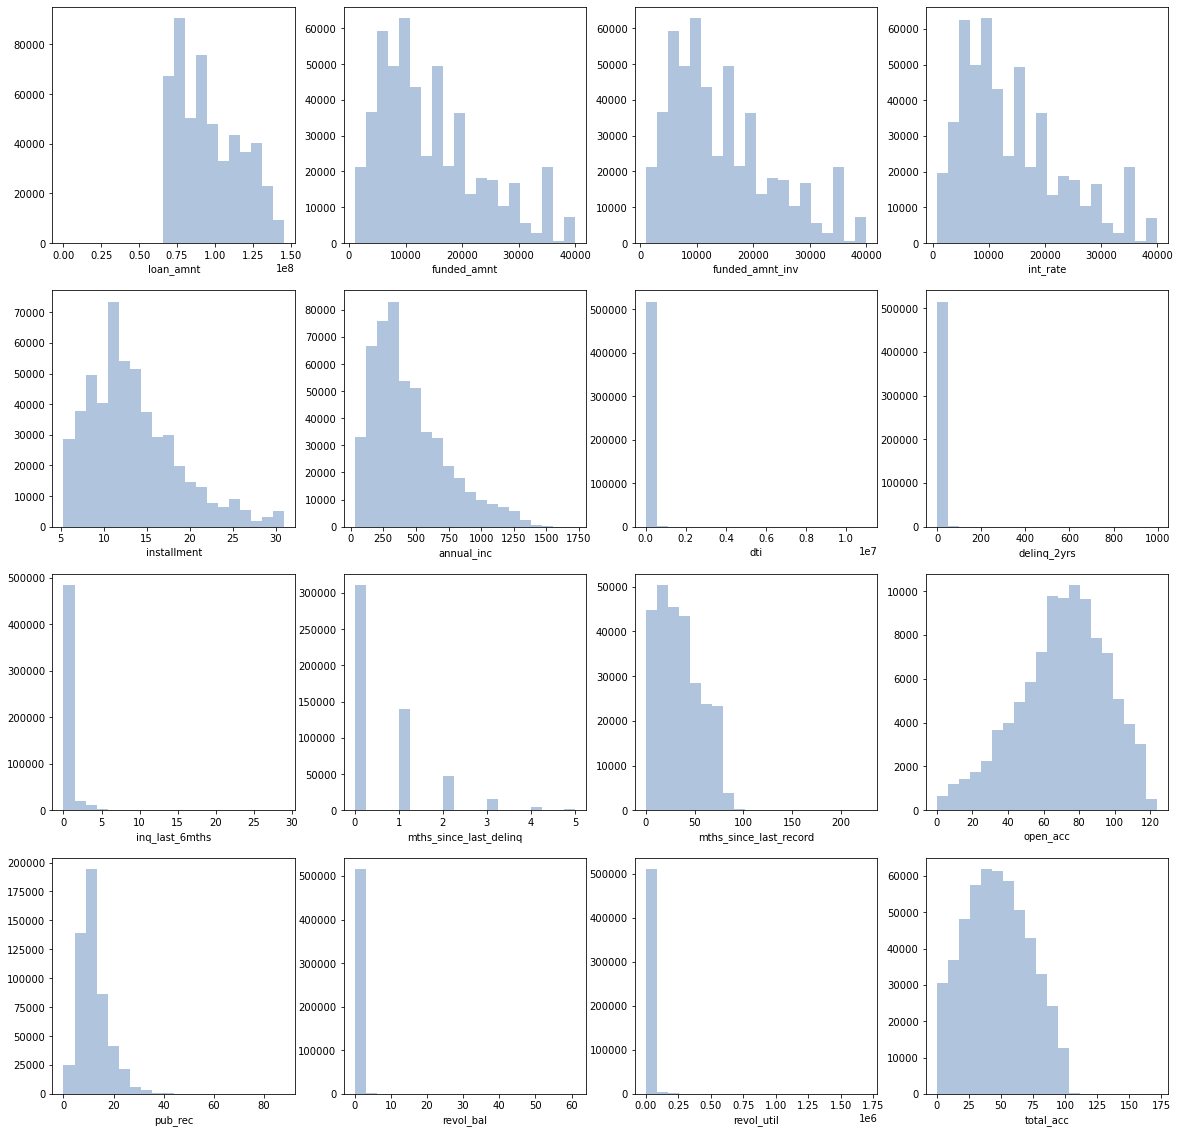

In [9]:
# plotting histograms of numeric variables : Set 1

plt.figure(figsize = (20,20))

num_cols_1 = num_cols[0:17]

for i in range(1,len(num_cols_1)):
    plt.subplot(4,4,i)
    plt.hist(df[num_cols_1[i-1]],color = "lightsteelblue", bins = 20)
    plt.xlabel(num_cols_1[i])

The following features appear strongly right-skewed: funded_amount, funded_amount_inv, int_rate, installment, annual_inc, loan_amnt, pub_rec

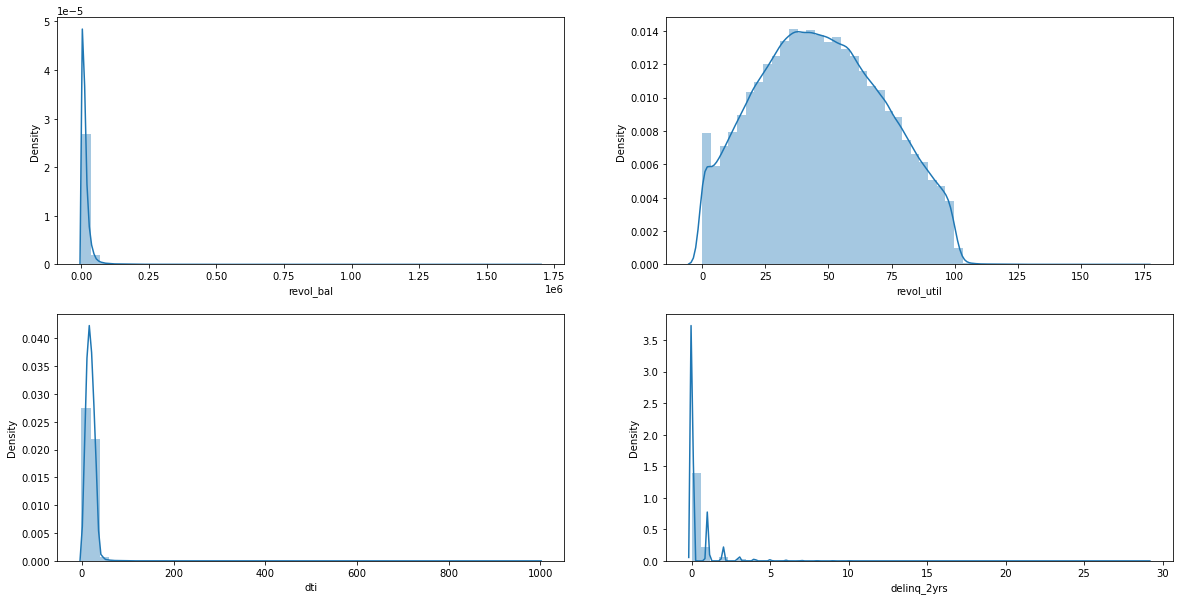

In [10]:
# certain distributions appear right skewed with extreme outliers 
# we can plot them separately 
plt.figure(figsize = (20,10))

cols_to_plot = ['revol_bal','revol_util','dti','delinq_2yrs']

for i in range(4):
    plt.subplot(2,2,i+1)
    sns.distplot(df[cols_to_plot[i]])

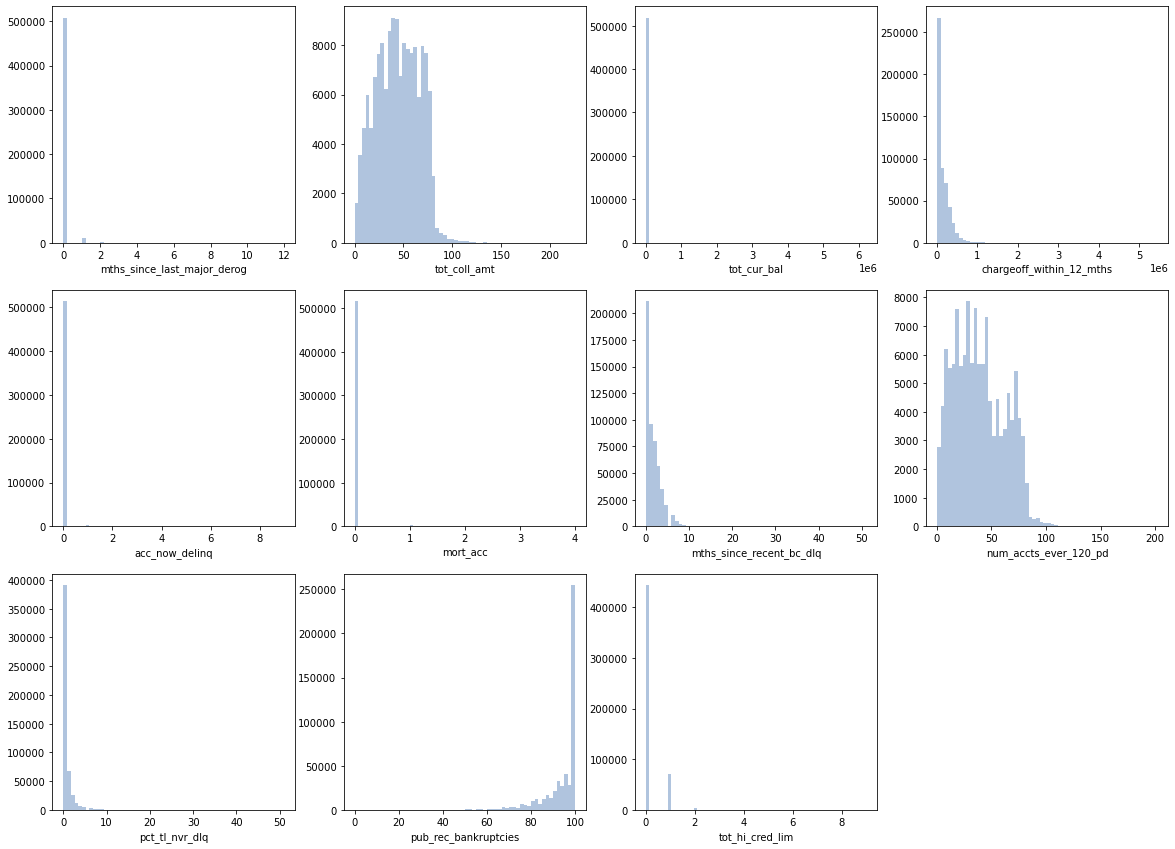

In [11]:
# plotting histograms of numeric variables : Set 2

num_cols_2 = num_cols[17:29]

plt.figure(figsize = (20,20))

for i in range(1,len(num_cols_2)):
    plt.subplot(4,4,i)
    plt.hist(df[num_cols_2[i-1]],color = "lightsteelblue", bins = 60)
    plt.xlabel(num_cols_2[i])

# Outliers

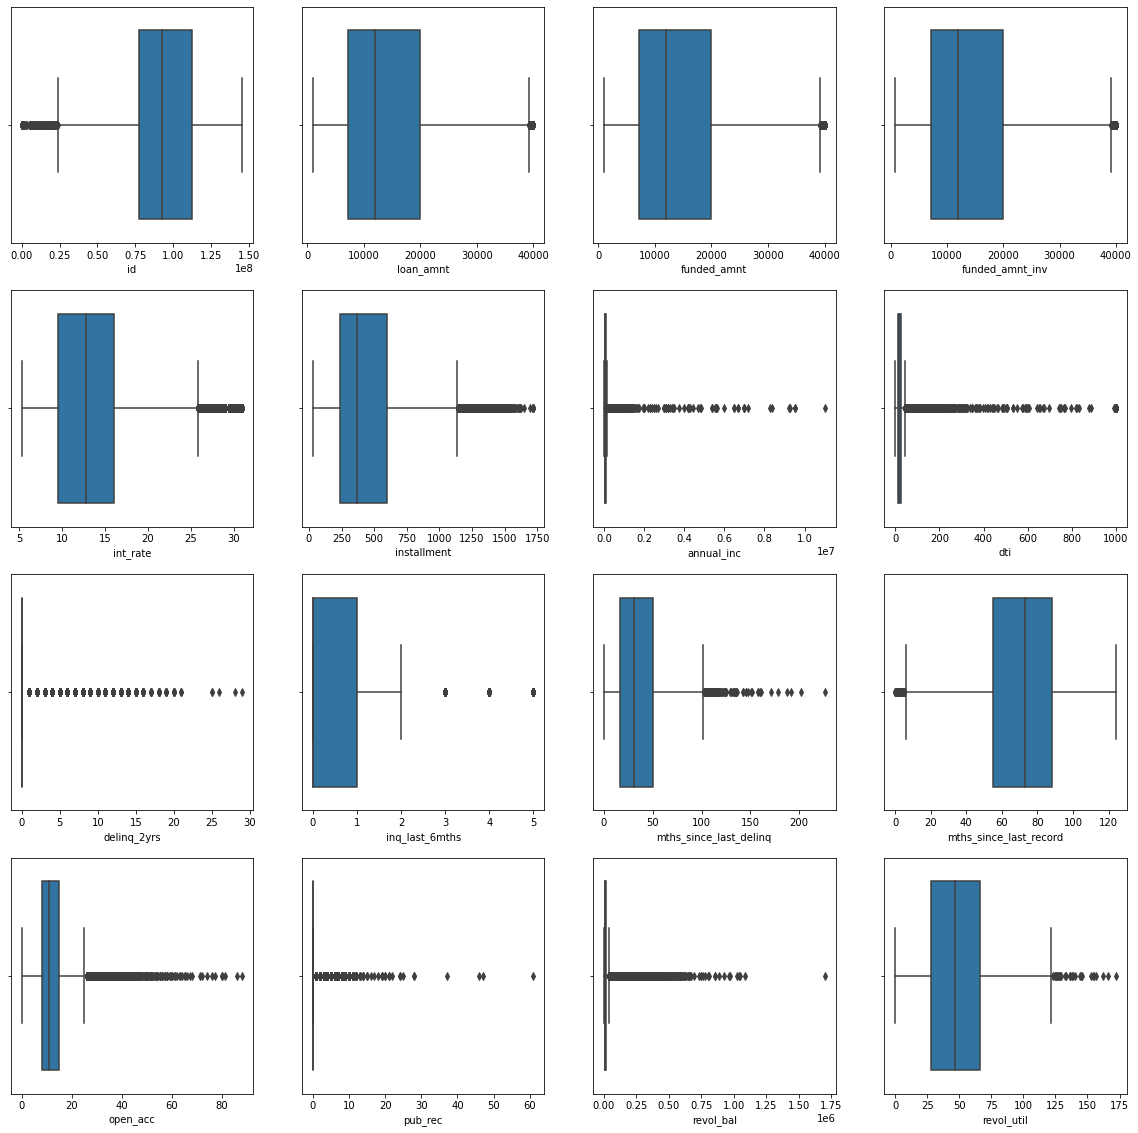

In [12]:
# plotting boxplot of numeric variables : Set 1

plt.figure(figsize = (20,20))

num_cols_1 = num_cols[0:17]

for i in range(1,len(num_cols_1)):
    plt.subplot(4,4,i)
    sns.boxplot(df[num_cols_1[i-1]])

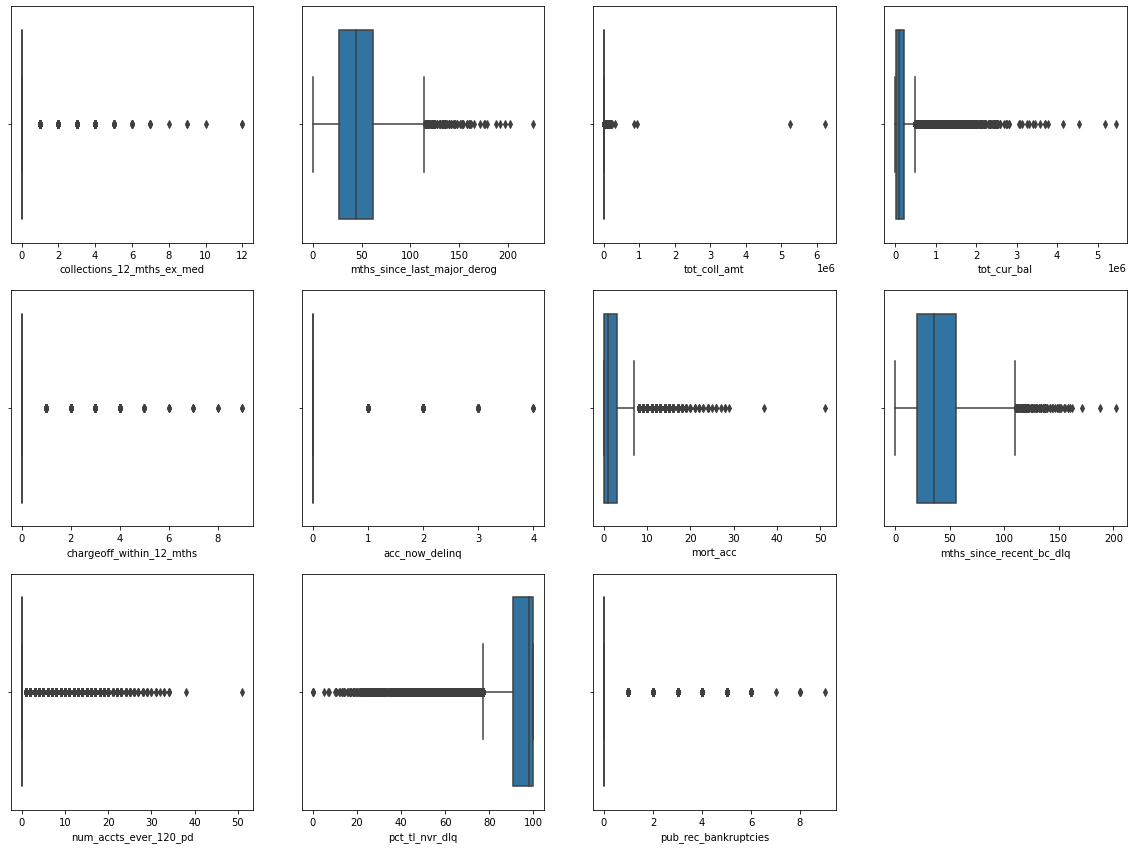

In [13]:
# plotting boxplot of numeric variables : Set 2

plt.figure(figsize = (20,20))

for i in range(1,len(num_cols_2)):
    plt.subplot(4,4,i)
    sns.boxplot(df[num_cols_2[i-1]])

### Categorical Univariate

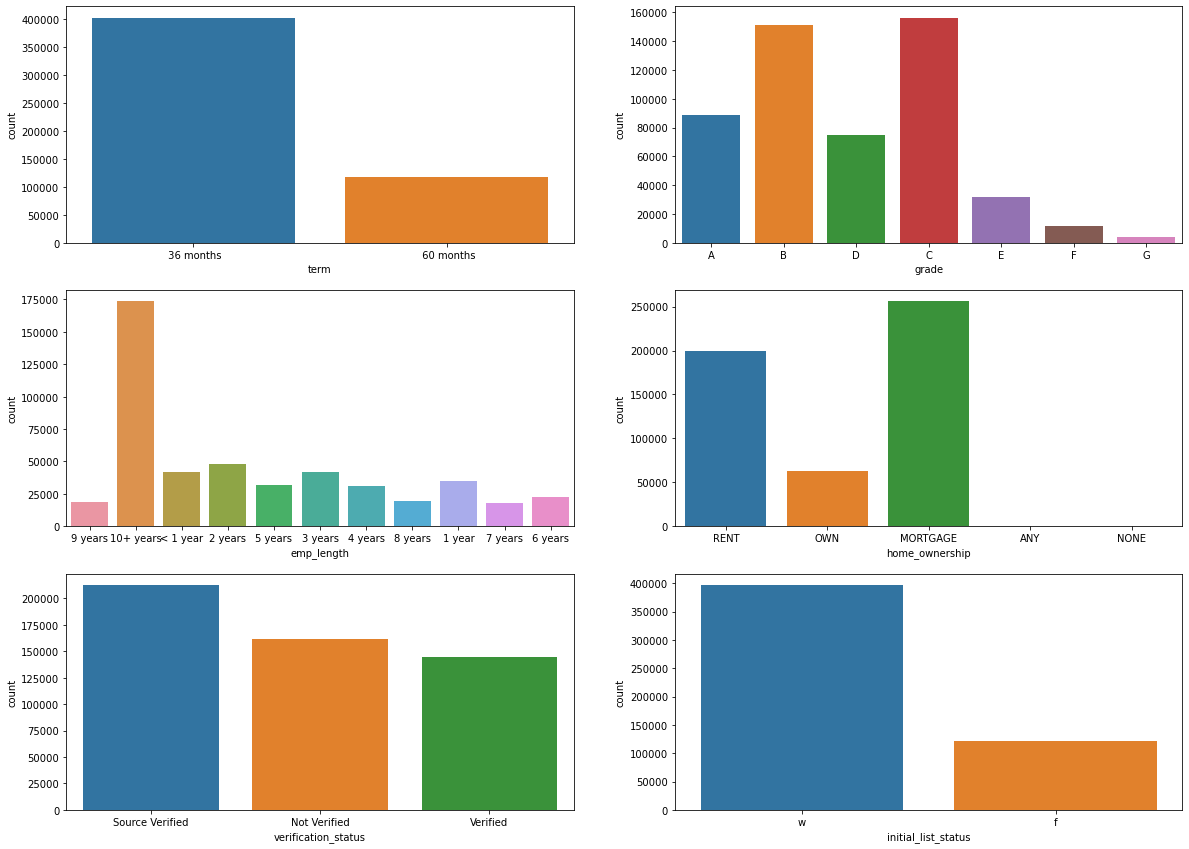

In [14]:
# analysing unqiue values and their counts in categorical variables

plt.figure(figsize = (20,20))

cat_cols_1 = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
              'initial_list_status','issue_d']

for i in range(1,len(cat_cols_1)):
    plt.subplot(4,2,i)
    sns.countplot(df[cat_cols_1[i-1]])

From the plot we can draw the following insights:
Majority of the applicants have mortgaged homes.
Most applicants have 10+ years of work experience.
Most loans are taken for 36 month term.
Most loan applicants are given 'Wait' as the initial list status.

<AxesSubplot:xlabel='purpose', ylabel='count'>

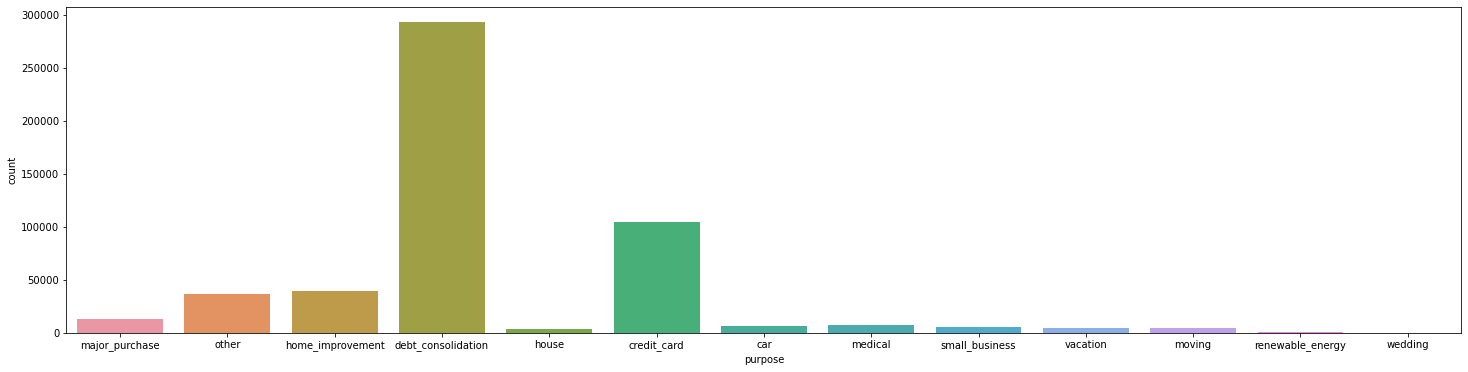

In [15]:
plt.figure(figsize = (25,6))

sns.countplot(df['purpose'])

The most common purpose for loan is debt consolidation, followed by credit card

<AxesSubplot:xlabel='addr_state', ylabel='count'>

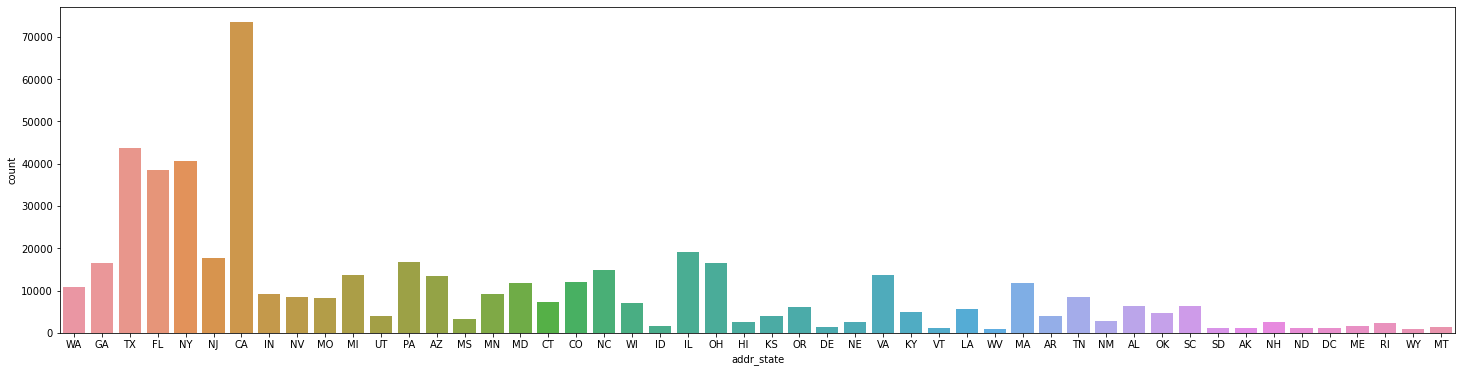

In [63]:
plt.figure(figsize = (25,6))

sns.countplot(df['addr_state'])

Maximum observations are from california.

## Target variable

<AxesSubplot:xlabel='loan_status', ylabel='count'>

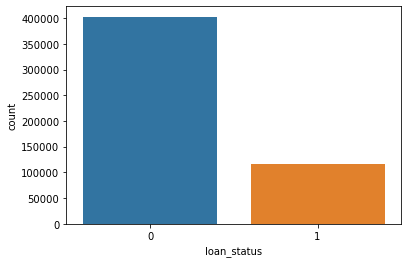

In [17]:
sns.countplot(df['loan_status'])

The target variable is imbalanced.

## Analyzing relationship between target and numeric variables

In [18]:
ncols = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','tot_cur_bal','delinq_2yrs',
         'inq_last_6mths','mths_since_last_delinq','mths_since_last_major_derog','mths_since_last_record','open_acc','pub_rec',
         'revol_bal','revol_util','total_acc','collections_12_mths_ex_med','tot_coll_amt','chargeoff_within_12_mths',
         'mths_since_recent_bc_dlq', 'pct_tl_nvr_dlq','pub_rec_bankruptcies']

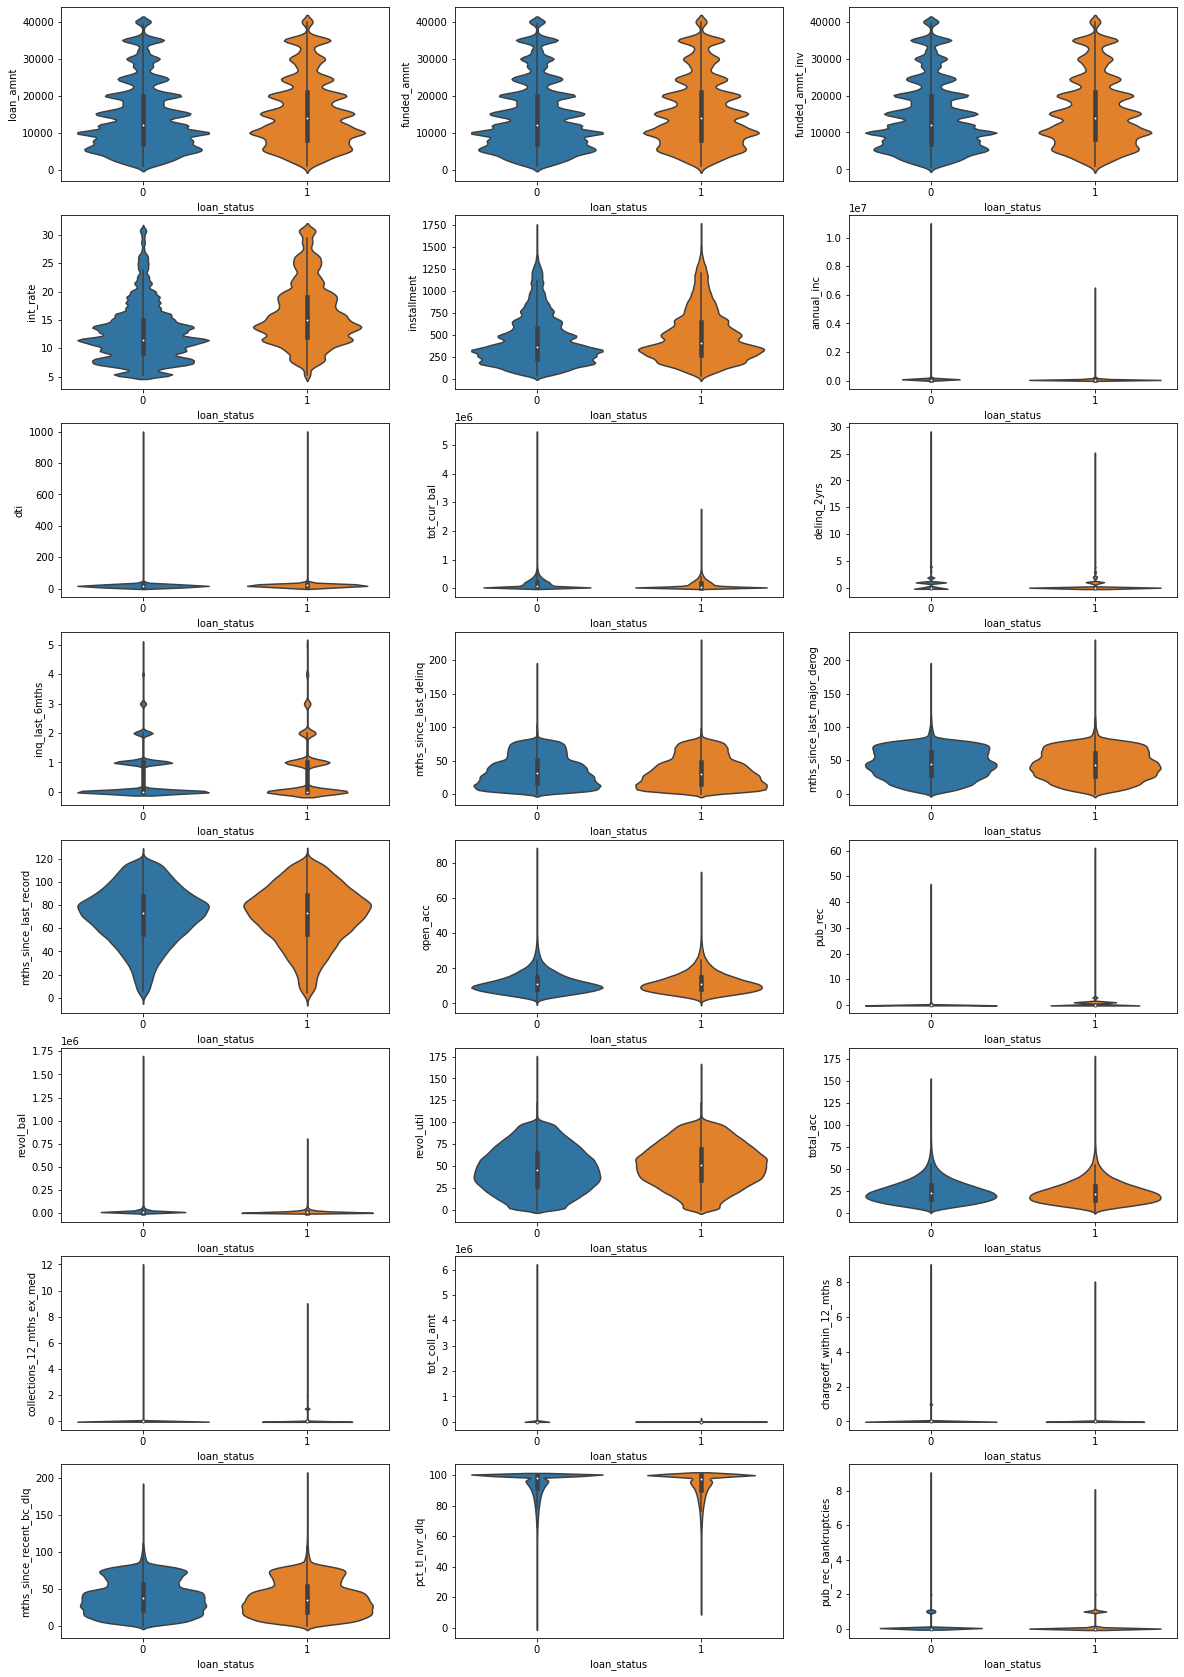

In [19]:
plt.figure(figsize = (20,30))

for i in range(1,len(ncols)+1):
    plt.subplot(8,3,i)
    sns.violinplot(x=df['loan_status'],y= df[ncols[i-1]])

plt.show()

 Most distributions are right skewed. he plots indicate that there are outliers in most of the features. Also the plots look similar for loan status Fully paid and Charged-off.
 
We can also notice that there are greater proportion of people with higher interest rates in charged-off when compared to fully paid.

## Analyzing relationship between independent variables

<AxesSubplot:xlabel='home_ownership', ylabel='loan_amnt'>

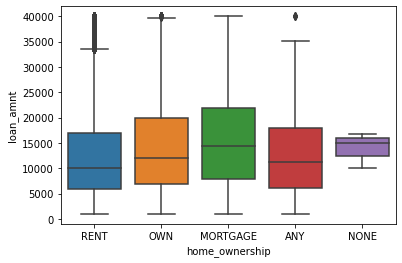

In [20]:
# Does home ownership affect Loan Amount 

sns.boxplot(data = df, x = 'home_ownership', y = 'loan_amnt')

There does not seem to be large variation in the means. Home ownership does not seem to have a large impact on loan amount. Only in the case where home_ownership is None we notice the IQR for loan amount is narrow compared to other categories.

In [21]:
# Is home ownership related to verification status (Do people with verified sources of income tend to own homes?) 

pd.crosstab(df['verification_status'], df['home_ownership'], normalize='columns')

home_ownership            ANY  MORTGAGE      NONE       OWN      RENT
verification_status                                                  
Not Verified         0.363958  0.336635  0.000000  0.317658  0.277239
Source Verified      0.388693  0.384671  0.666667  0.414423  0.441615
Verified             0.247350  0.278694  0.333333  0.267919  0.281146

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

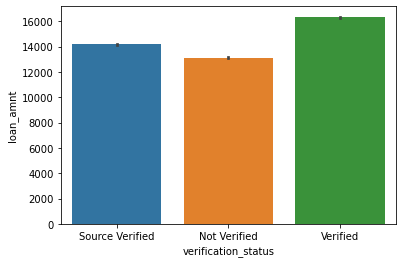

In [22]:
# Does verification status affect loan amount 

sns.barplot(data = df, x = 'verification_status', y = 'loan_amnt')

The average loan amount is slightly higher for those with verified income.

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

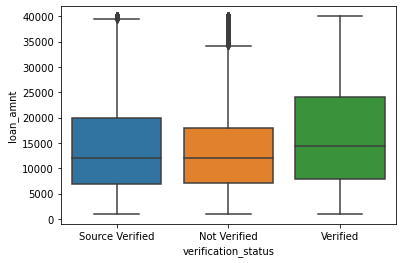

In [23]:
sns.boxplot(data = df, x = 'verification_status', y = 'loan_amnt')

<AxesSubplot:xlabel='dti', ylabel='loan_amnt'>

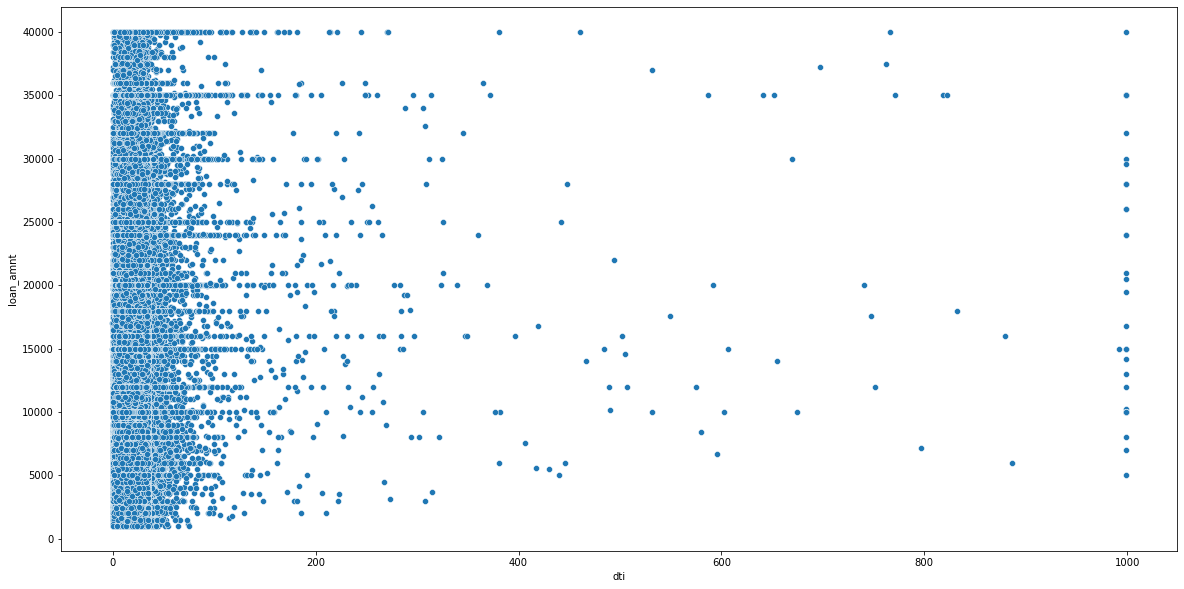

In [24]:
# Debt to Income vs Loan amount (Were people with high DTI given lower loan amounts?) 

plt.figure(figsize = (20,10))

sns.scatterplot(x = df['dti'], y = df['loan_amnt'])

There does not seem to be any relation between dti and loan amount.
There are outliers in the plot with very high dti and loan amount.

<AxesSubplot:xlabel='funded_amnt', ylabel='funded_amnt_inv'>

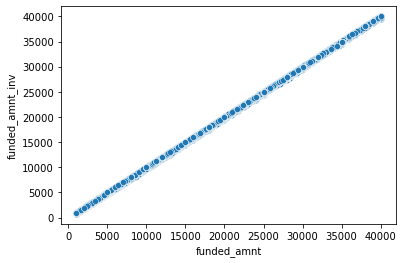

In [25]:
# Funded Amount vs Funded Amount Investor 

sns.scatterplot(data = df, x = 'funded_amnt', y = 'funded_amnt_inv')

Plot shows a perfect positive linear relationship indicating that funded_amnt_inv = funded_amnt

In [26]:
# Average Loan amounts provided per state


df_agg = df.groupby('addr_state')['loan_amnt'].mean()

df_agg = df_agg.to_frame()

fig = px.choropleth(data_frame=df_agg,locations = df_agg.index, locationmode="USA-states", color=df_agg['loan_amnt'], scope="usa")
fig.show()

Alaska has the highest average loan amount.

<AxesSubplot:xlabel='addr_state', ylabel='home_ownership'>

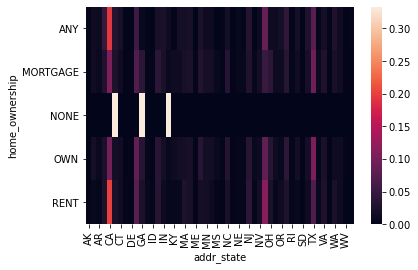

In [27]:
# Home ownership proportion per state

sns.heatmap(pd.crosstab(df['home_ownership'],df['addr_state'], normalize='index'))

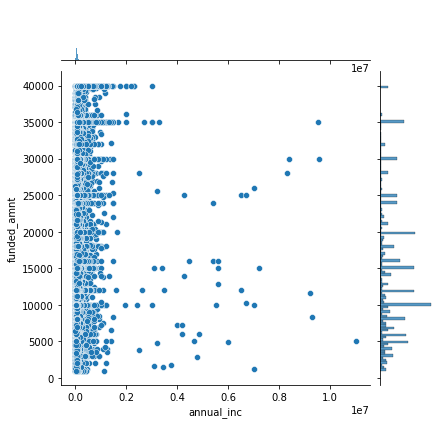

In [28]:
# Income vs loan amt

sns.jointplot(x = df['annual_inc'], y = df['funded_amnt'])

plt.ticklabel_format(style='plain')

There does not seem to be any relation between annual income and loan amount. There are outliers in the plot with very high funded amount and annual income.

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

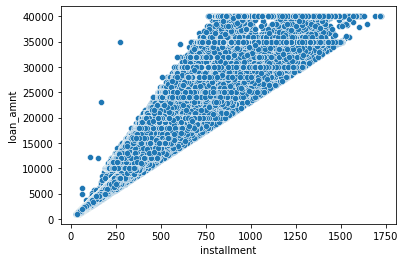

In [29]:
# is the number of installments related to loan amount 

sns.scatterplot(df.installment,df.loan_amnt)

The scatterplot shows a positive linear relationship.

In [30]:
##Charged off vs State

x = df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,1].sort_values(ascending=False)
df_state = x.to_frame(name='charged_off_ratio')

In [31]:
fig = px.choropleth(df_state,locations=df_state.index, locationmode="USA-states", color=df_state['charged_off_ratio'], scope="usa")
fig.show()

#### Mississippi has highest pct of charged off

In [32]:
## Loan status vs No. of mortgage accounts

df.groupby('loan_status')['mort_acc'].describe()

count      mean       std  min  25%  50%  75%   max
loan_status                                                        
0            402449.0  1.647603  1.890001  0.0  0.0  1.0  3.0  51.0
1            116257.0  1.220804  1.659945  0.0  0.0  1.0  2.0  29.0

#### Ppl who pay off their loans are more likely to have mortgage accounts

<AxesSubplot:xlabel='pub_rec_bankruptcies'>

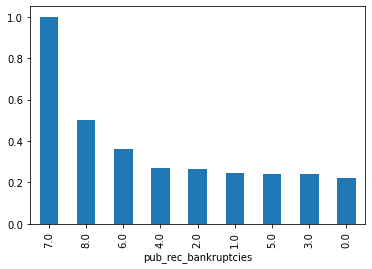

In [33]:
## pub_rec_bankruptices vs loan status

df.groupby('pub_rec_bankruptcies')['loan_status'].value_counts(normalize=True)\
.loc[:,1].sort_values(ascending=False).plot(kind='bar')

#### Ppl with higher number of pub_rec_bankruptices records are more likely to be charged off

In [34]:
## DTI vs state

x = df.groupby('addr_state')['dti'].mean().sort_values(ascending=False)

df_dti = x.to_frame()

In [35]:
fig = px.choropleth(df_dti,locations=df_dti.index, locationmode="USA-states", color=df_dti['dti'], scope="usa")
fig.show()

#### Idaho state has highest DTI ratio

<AxesSubplot:xlabel='grade'>

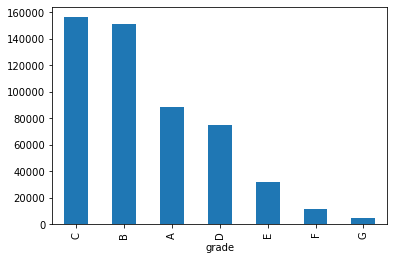

In [36]:
## Count of open credit lines(open_acc) by Grade

df.groupby('grade')['open_acc'].count().sort_values(ascending=False).plot(kind='bar')



#### So grade C has highest number of open credit lines in the borrower's credit file.

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

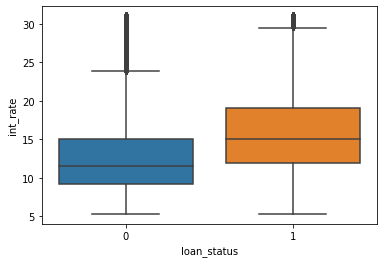

In [37]:
## loan status vs int_rate

sns.boxplot(x='loan_status',y='int_rate',data=df)


#### Charged off has higher interest rates as compared to full paid loan status

<AxesSubplot:xlabel='term', ylabel='int_rate'>

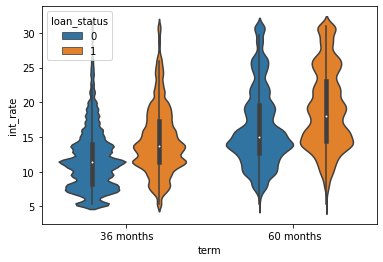

In [38]:
## Term vs int_rate vs status

sns.violinplot(x='term',y='int_rate',hue='loan_status',data=df)



#### More people have higher interest rates for the 60 month term for loan when compared to 36 month term.

In [39]:
# ## Derogatory public records vs loan status

# pd.crosstab(df['pub_rec'], df['loan_status'])

loan_status       0      1
pub_rec                   
0.0          327533  91284
1.0           62948  20756
2.0            7828   2776
3.0            2429    816
4.0             863    327
5.0             420    145
6.0             204     71
7.0              94     32
8.0              45     11
9.0              29     12
10.0             14      6
11.0             11      6
12.0             10      3
13.0              5      1
14.0              2      2
15.0              2      1
16.0              0      1
17.0              1      0
18.0              0      1
19.0              1      2
20.0              2      0
21.0              1      1
22.0              0      1
24.0              2      0
25.0              0      1
28.0              2      0
37.0              1      0
46.0              1      0
47.0              1      0
61.0              0      1

<AxesSubplot:xlabel='pub_rec'>

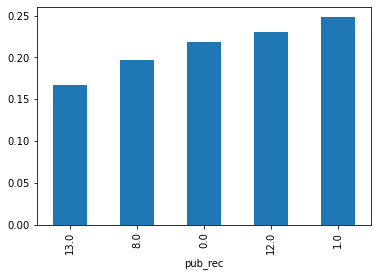

In [61]:
df.groupby('pub_rec')['loan_status'].value_counts(normalize=True)\
.loc[:,1].sort_values(ascending=True).head().plot(kind='bar')


<AxesSubplot:xlabel='purpose'>

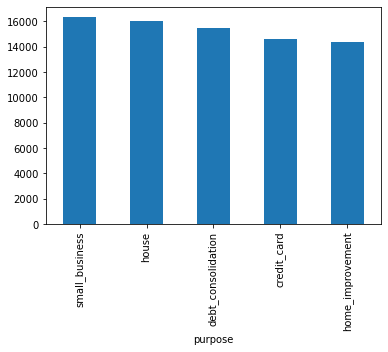

In [59]:
## Purpose vs loan amt

df.groupby('purpose')['loan_amnt'].mean().sort_values(ascending=False).head().plot(kind='bar')

#### Avg loan amount is higher of categories like small_business,house..

## Analysing relationship between target variable and categorical variables

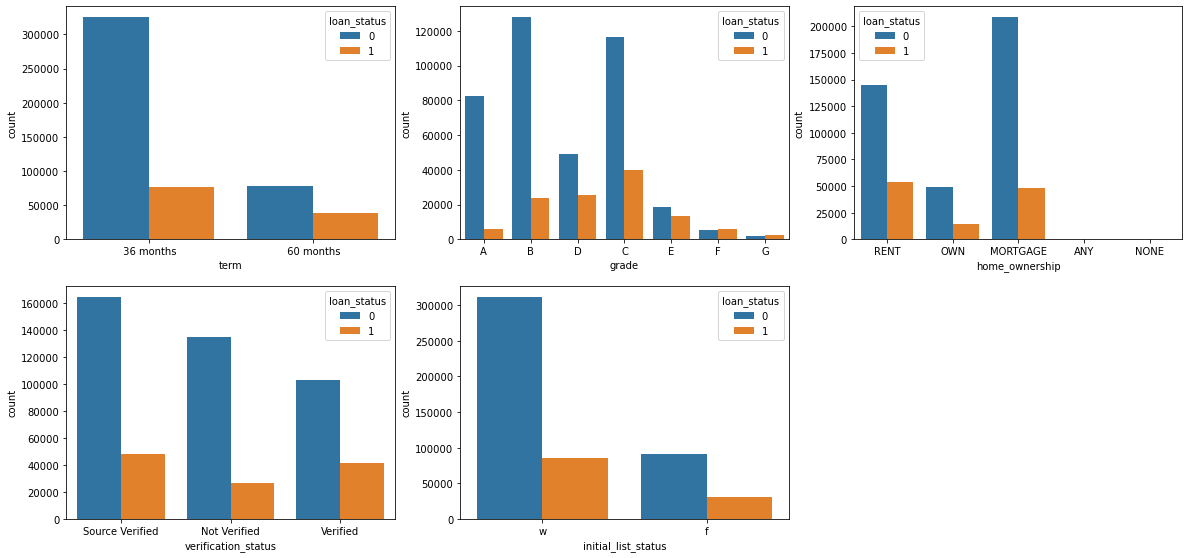

In [42]:
cols = ['term','grade','home_ownership','verification_status','initial_list_status']

plt.figure(figsize = (20,30))

for i in range(1,len(cols)+1):
    plt.subplot(6,3,i)
    sns.countplot(df[cols[i-1]], hue=df['loan_status'])
    
plt.show()

#### Most of the fully paid loans are for term 36 months
#### Grade C has highest charged off count
#### Verified source has more charged off ratio as compared to not verified

<Figure size 1440x2160 with 0 Axes>

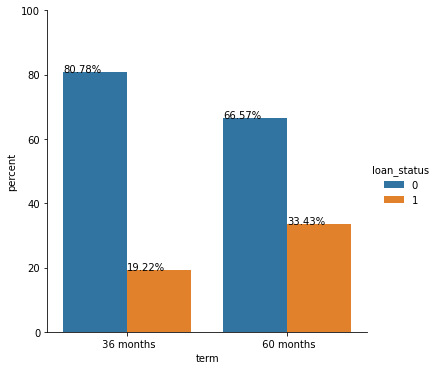

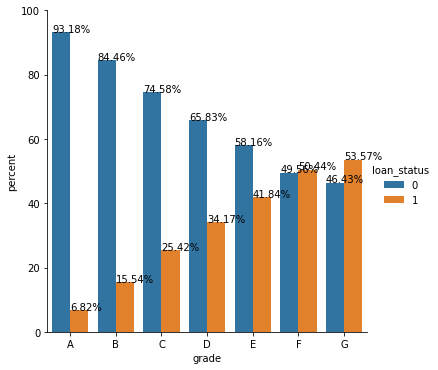

posx and posy should be finite values
posx and posy should be finite values


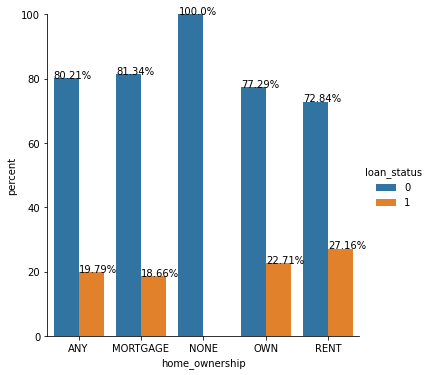

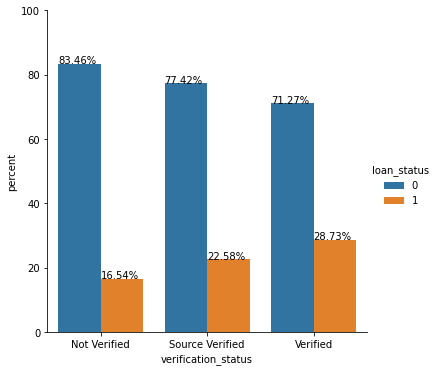

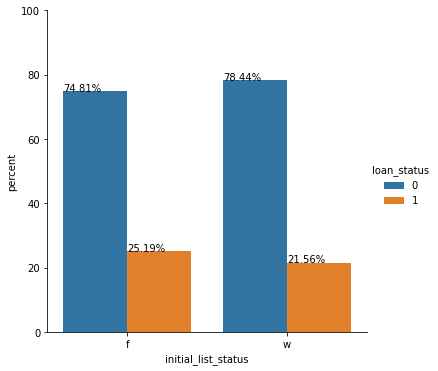

In [43]:
cols = ['term','grade','home_ownership','verification_status','initial_list_status']


plt.figure(figsize = (20,30))

for i in range(1,len(cols)+1):
    
    x,y = cols[i-1], 'loan_status'
               
    df1 = df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,
                y='percent',
                hue=y,
                kind='bar',
                data=df1)

    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
    plt.show()

<AxesSubplot:xlabel='emp_length', ylabel='count'>

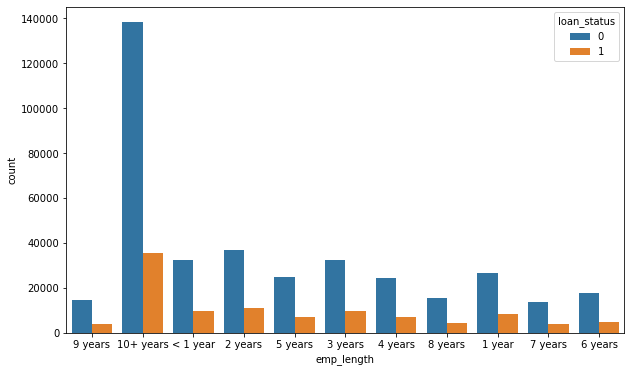

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='emp_length', hue='loan_status')

#### Emp length of 10+years has most number of Fully paid loans 

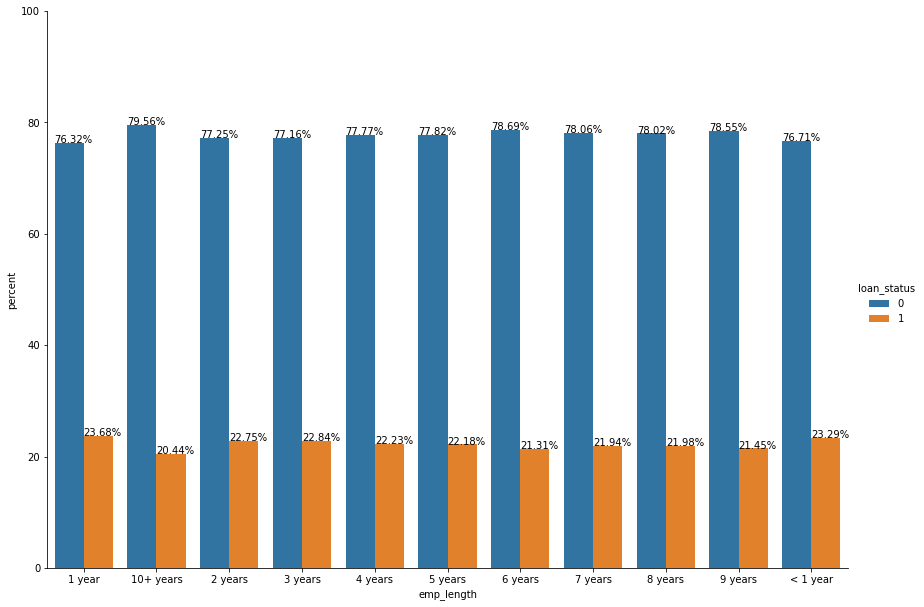

In [45]:
#df.groupby('loan_status')['emp_length'].value_counts(normalize=True).plot(kind='bar')

x,y = 'emp_length', 'loan_status'
           
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,
                y='percent',
                hue=y,
                kind='bar',
                data=df1, height=8.27, aspect=11.7/8.27)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#### Percentage of Fully paid vs Charged off more or less remains the same across all emp length

<AxesSubplot:xlabel='purpose', ylabel='count'>

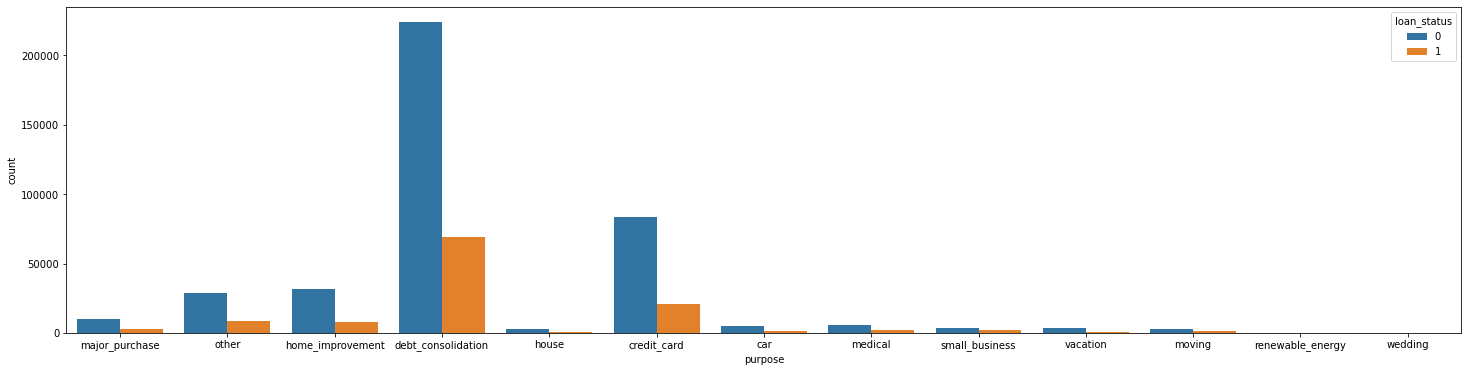

In [46]:
plt.figure(figsize=(25,6))
sns.countplot(data=df, x='purpose', hue='loan_status')

#### Most of the loans were fully paid with the purpose which they were granted being Debt_consolidation

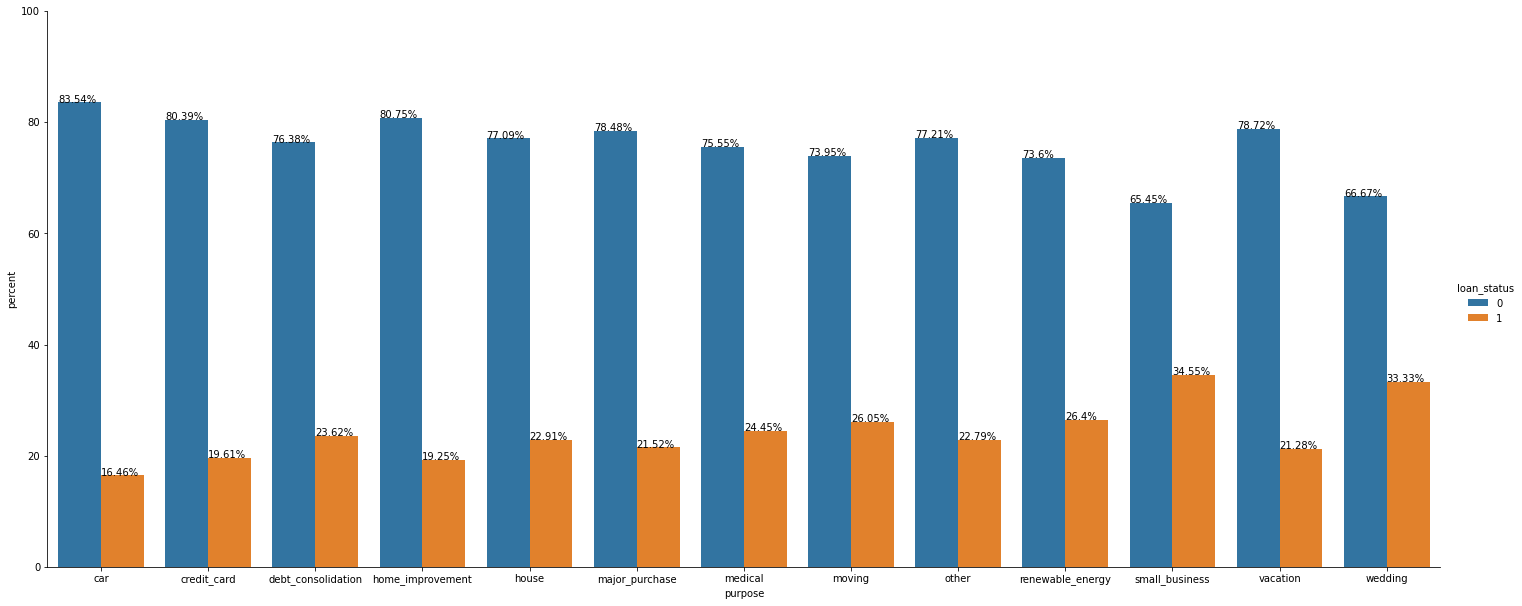

In [47]:
x,y = 'purpose', 'loan_status'
           
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,
                y='percent',
                hue=y,
                kind='bar',
                data=df1, height=8.27, aspect=20/8.27)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [48]:
df_2 = df.copy()

In [49]:
df_2['issue_month'] = df_2['issue_d'].str.split('-').apply(lambda X : X[0])
df_2['issue_year'] = df_2['issue_d'].str.split('-').apply(lambda X : X[1])
df_2['issue_year'] = pd.to_numeric(df_2['issue_year'])

<AxesSubplot:xlabel='issue_month', ylabel='count'>

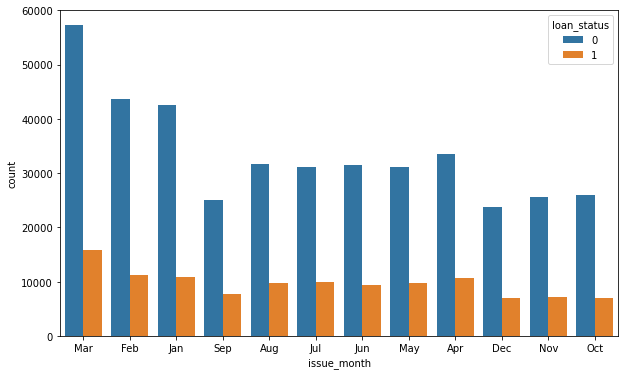

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_2, x='issue_month', hue='loan_status')

#### March has the highest issue of fully paid loans

In [51]:
months = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, "Jul":7, 
          "Aug":8, "Sep":9 , "Oct":10, "Nov":11, "Dec":12}
df_2.replace({"issue_month": months}, inplace=True)

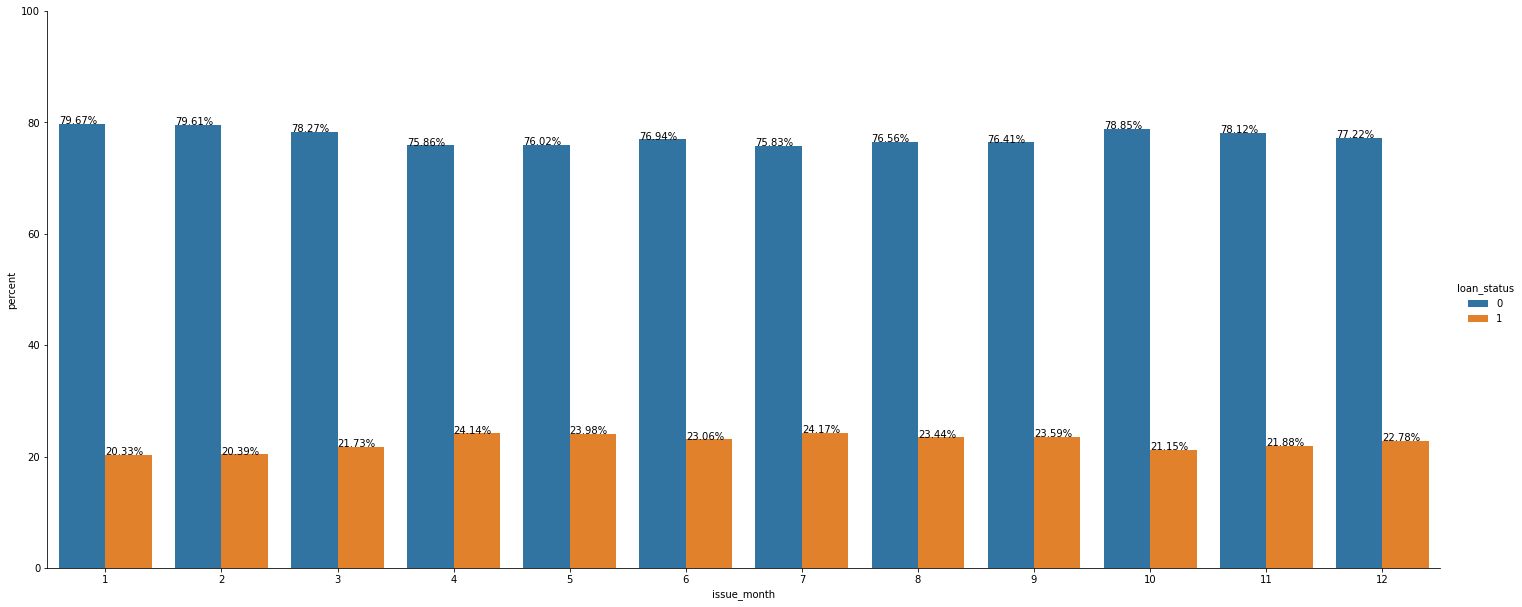

In [52]:
#df.groupby('loan_status')['emp_length'].value_counts(normalize=True).plot(kind='bar')

x,y = 'issue_month', 'loan_status'
           
df1 = df_2.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,
                y='percent',
                hue=y,
                kind='bar',
                data=df1, height=8.27, aspect=20/8.27)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#### The proportion of people in both categories of loan status is alomst the same for all issue months. 

<AxesSubplot:xlabel='issue_year', ylabel='count'>

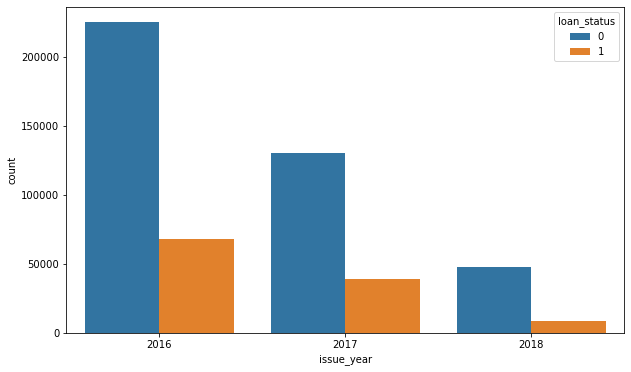

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_2, x='issue_year', hue='loan_status')

#### Year 2016 has highest number of full paid loans and Charged off loans as comapared to rest of the years

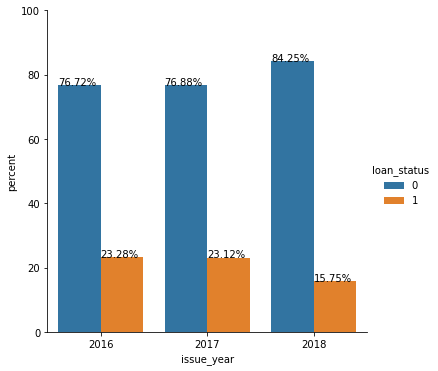

In [54]:
#df.groupby('loan_status')['emp_length'].value_counts(normalize=True).plot(kind='bar')

x,y = 'issue_year', 'loan_status'
           
df1 = df_2.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,
                y='percent',
                hue=y,
                kind='bar',
                data=df1)

g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#### Although the count of records reduces form 2016 to 2018, we see that the proportion of people who have fully paid the loan is consistently high for all years (above 75 %).